In [1]:
# Authenticate to Azure and get the access to ML studio 
from azureml.core import Workspace,Dataset
workspace = Workspace.from_config()
datastore = workspace.get_default_datastore()
print(datastore)

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code AXXNYDGME to authenticate.
You have logged in. Now let us find all the subscriptions to which you have access...
Interactive authentication successfully completed.
{
  "name": "workspaceblobstore",
  "container_name": "azureml-blobstore-cf3a22ef-7eac-4b0f-ba7f-03bc0b1782c5",
  "account_name": "potato0226316394",
  "protocol": "https",
  "endpoint": "core.windows.net"
}


In [5]:
# Accumulate all local files (if any) to cloud
!ls

canceranalysis.ipynb  right.csv


In [3]:
myfiles = ['right.csv']
datastore.upload_files(files=myfiles, target_path='newbca/')

Uploading an estimated of 1 files
Uploading right.csv
Uploaded right.csv, 1 files out of an estimated total of 1
Uploaded 1 files


$AZUREML_DATAREFERENCE_ee5c6bb79eb6466480cc892582e8a394

In [6]:
dataset = Dataset.Tabular.from_delimited_files(path=(datastore,'newbca/*.csv'))

In [7]:
print(dataset)

TabularDataset
{
  "source": [
    "('workspaceblobstore', 'newbca/*.csv')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ParseDelimited",
    "DropColumns",
    "SetColumnTypes"
  ]
}


In [8]:
registeredDataset = dataset.register(workspace, name='modifiedbca', create_new_version=True)

In [9]:
########## ASSSUME We are writing a new file ########

from azureml.core import Workspace, Dataset

subscription_id = '353b9ff5-223a-4dc4-853e-825bc329d30c'
resource_group = 'tomato'
workspace_name = 'potato'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='modifiedbca')
df = dataset.to_pandas_dataframe()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


4 steps in machine learning :

1) Exploratory data analysis (here on notebook)

2) Training (separate script for automation)

3) Scoring (separate script for test automation)

4) Inference (separate script for production)
    - run the model
    - yaml configuration- pip installs, conda dependencies 

In [16]:
mySelectedCols = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
data = df.loc[:, mySelectedCols] 
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [14]:
!pip install seaborn

     |████████████████████████████████| 283 kB 3.3 MB/s eta 0:00:01


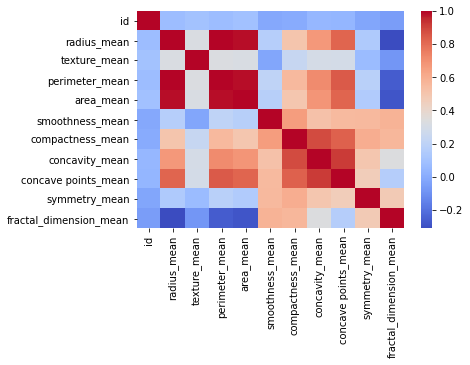

In [17]:

import numpy
import matplotlib.pyplot as plt
import seaborn as sns
crs = data.corr()
sns.heatmap(crs, cmap='coolwarm')

<Figure size 432x288 with 0 Axes>

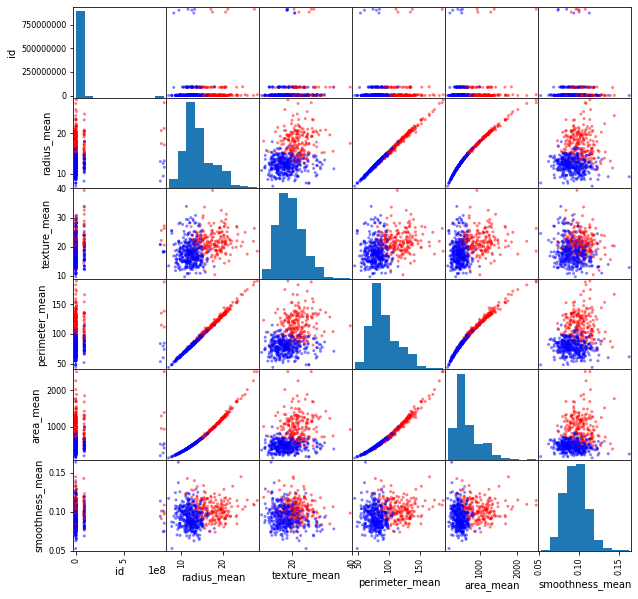

In [21]:
import pandas as pd
diagnosis = data.loc[:,'diagnosis']
encoding_logic = lambda val: 'red' if val=='M' else 'blue'
diagnosis_encoded = diagnosis.map(encoding_logic) 
inputs = data.loc[:,['id','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] ]
plt.figure()
sm = pd.plotting.scatter_matrix(inputs, c=diagnosis_encoded, figsize=(10,10))
plt.show()

In [22]:
data.set_index('id', inplace=True)

In [32]:

x = data.iloc[:, 1:]
y = data.iloc[:, 0]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)
print(len(xtrain))
print(len(ytrain))
print(len(xtest))
print(len(ytest))


455
455
114
114


In [35]:
# Z-score
# X-mean/std 
# .describe -> and then use it via numpy methods on x
stats = xtrain.describe().T
mu = stats['mean']
sigma = stats['std']
normxtrain = (xtrain-mu)/sigma
normxtest = (xtest-mu)/sigma 
normxtrain.head()
# 4:15<- resuming from break 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
859471,-1.439169,-0.434841,-1.360587,-1.137865,0.779715,0.718131,2.820030,-0.119019,1.091461,2.455470
873593,1.971926,1.731120,2.089372,1.849937,1.318392,3.422508,2.010899,2.662102,2.124665,1.556682
859196,-1.398443,-1.248248,-1.343730,-1.108565,-1.331180,-0.307017,-0.365156,-0.695736,1.928211,0.953329
88466802,-0.980717,1.414665,-0.981507,-0.865991,0.059325,-0.596132,-0.819301,-0.844186,0.312920,0.073960
858970,-1.116471,-1.009149,-1.123765,-0.964880,1.268115,-0.438519,-0.982260,-0.929577,3.390704,0.949168


In [38]:
# Multiple ML Models-> multiple hps
# HYPERDRIVE
from azureml.core.compute import ComputeTarget, AmlCompute 
from azureml.core.compute_target import ComputeTargetException

name = 'monstercluster'
try:
    myclusterconfig = AmlCompute.provisioning_configuration(vm_size='STANDARD_DS11_V2', max_nodes=3)   
    cluster = ComputeTarget.create(workspace, name, myclusterconfig)
    cluster.wait_for_completion(show_output=True)
except Exception as e:
    print(e)




Creating
Succeeded
AmlCompute wait for completion finished

Minimum number of nodes requested have been provisioned


In [40]:
# Experiment to TRAIN Model 
from azureml.core import Experiment 
from azureml.train.sklearn import SKLearn 
from azureml.train.hyperdrive import GridParameterSampling
from azureml.train.hyperdrive import BanditPolicy 
from azureml.train.hyperdrive import HyperDriveConfig
from azureml.train.hyperdrive import PrimaryMetricGoal
from azureml.train.hyperdrive import choice 
from azureml.widgets import RunDetails 
from sklearn.ensemble import RandomForestClassifier 
import time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

randomForestParams = GridParameterSampling({
    '--treeCount': choice(5,10,20,50,100,200)
})
primaryMetric = 'accuracy'
goal = PrimaryMetricGoal.MAXIMIZE
earlyTermination = BanditPolicy(slack_factor=0.1,delay_evaluation=5,evaluation_interval=1)



